In [1]:
import pandas as pd
import logomaker as lm
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

import json 

sns.set_style('white')

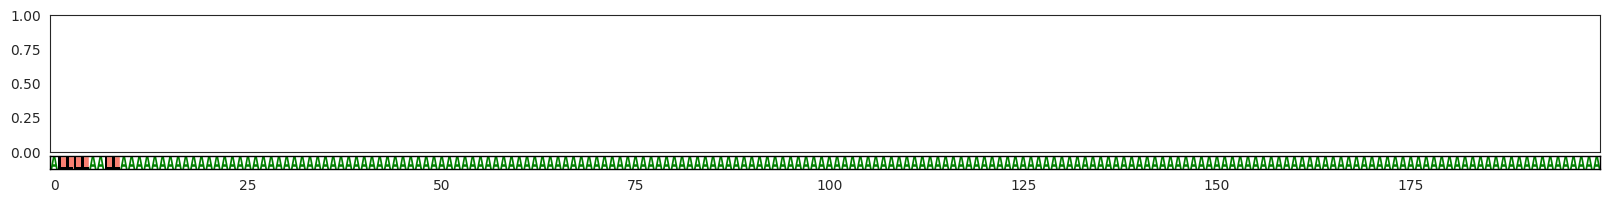

In [2]:
def make_logo_plot(seq,agg_regions):
    fig, (ax1, ax2) = plt.subplots(2, 1,
                                   figsize=(len(seq)/10.0, 2), # scale according to length
                                   gridspec_kw={'height_ratios': [1, 0.1], 'hspace': 0.05})  # Create subplots with specified height ratios and no vertical space between subplots
    
    # Add residue scores
    
    # Add sequence/agg region
    count_df = lm.alignment_to_matrix([seq], to_type='counts')
    logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity',ax=ax2)
    logo_wt.ax.set_title('')
    logo_wt.ax.xaxis.set_ticks_position('none')
    logo_wt.style_spines(spines=['top', 'bottom', 'left', 'right'], visible=True)
    logo_wt.ax.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    for region in agg_regions:
        logo_wt.highlight_position_range(pmin=region[0], pmax=region[1], color='salmon')
    return

# example for testing
test_seq = 'ALLLLAALLA'+'A'*190
agg_regions = [[1,4],[7,8],[200,300]] #NOTE: it doesn't complain if you try to highlight a position outside of seq

make_logo_plot(test_seq,agg_regions)
# plt.savefig('test.png')

In [3]:
# load data
path = 'json/250211_amypro.json'
with open(path) as file:
    data = json.load(file)
print(len(data))

df = pd.json_normalize(data)
df

125


,entry_id,pdb_id,pubmed_ids,protein_name,prion_domain,class_name,uniprot_id,sequence,mutations,uniprot_end,...,regions.region_1.region_indices,regions.region_1.region_sequence,regions.region_2.region_indices,regions.region_2.region_sequence,regions.region_3.region_indices,regions.region_3.region_sequence,regions.region_4.region_indices,regions.region_4.region_sequence,regions.region_5.region_indices,regions.region_5.region_sequence
0,AP00055,N/A,"[19345193, 22561191]",Nup100,True,not known,Q02629,MFGNNRPMFGGSNLSFGSNTSSFGGQQSQQPNSLFGNSNNNNNSTS...,[],,...,300-400,GVFGQNNNQMQINGNNNNSLFGKANTFSNSASGGLFGQNNQQQGSG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AP00054,N/A,"[19345193, 21453424]",New1,True,functional prion,Q08972,MPPKKFKDLNSFLDDQPKDPNLVASPFGGYFKNPAADAGSNNASKK...,[],,...,1-153,MPPKKFKDLNSFLDDQPKDPNLVASPFGGYFKNPAADAGSNNASKK...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AP00057,N/A,[24981173],Tia1,True,functional prion,P52912,MEDEMPKTLYVGNLSRDVTEALILQLFSQIGPCKNCKMIMDTAGND...,[],,...,290-386,MINPVQQQNQIGYPPTYGQWGQWYGNAQQIGQYVPNGWQVPAYGVY...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AP00056,N/A,"[19345193, 23512891]",Lsm4,True,functional prion,P40070,MLPLYLLTNAKGQQMQIELKNGEIIQGILTNVDNWMNLTLSNVTEY...,[],,...,91-187,QQINSNNNSNSNGPGHKRYYNNRDSNNNRGNYNRRNNNNGNSNRRP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AP00051,N/A,[25229478],Egg envelope protein ZP2,False,functional amyloid,Q9PWC8,SPHWKHGRHPHRPHHPHGLTVQQSDYLIKEIVQPQVSQPLPVRVEE...,[],428,...,95-100,VTVQCI,189-195,FEVLFQC,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,AP00065,4ZGM,[19541956],Glucagon-like peptide 1,False,functional amyloid,P01275,HDEFERHAEGTFTSDVSSYLEGQAAKEFIAWLVKGRG,[],128,...,1-37,HDEFERHAEGTFTSDVSSYLEGQAAKEFIAWLVKGRG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,AP00109,N/A,"[27028204, 25234689]",Cn-AMP2,False,functional amyloid,P86706,TESYFVFSVGM,[],,...,1-11,TESYFVFSVGM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,AP00108,N/A,[10781099],ADan peptide,False,pathogenic,Q9Y287,EASNCFAIRHFENKFAVETLICFNLFLNSQEKHY,[S266FNLFLNSQEKHY],,...,1-34,EASNCFAIRHFENKFAVETLICFNLFLNSQEKHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,AP00124,1ZMQ,"[22722251, 27151743, 25158166]","Human α-defensin 6, HD6",False,functional amyloid,Q01524,AFTCHCRRSCYSTEYSYGTCTVMGINHRFCCL,[],100,...,1-32,AFTCHCRRSCYSTEYSYGTCTVMGINHRFCCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# run the model here and get the residue scores for each sequence

In [6]:
# call this before generating 100 plots
# plt.ioff()

{'region_indices': '95-100', 'region_sequence': 'VTVQCI'}
{'region_indices': '189-195', 'region_sequence': 'FEVLFQC'}


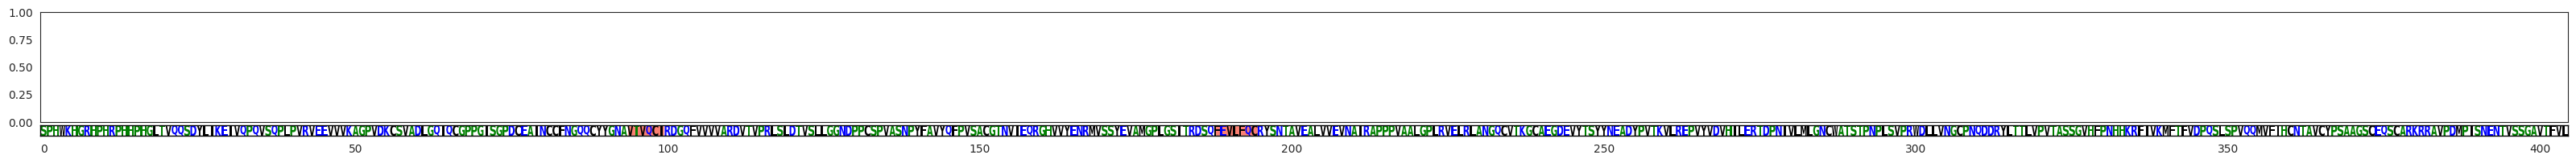

In [10]:
def validate_region(full_seq,region_seq,start_idx,stop_idx):
    # checks that the idx are correct
    return full_seq[start_idx:stop_idx+1] == region_seq

dir_name = 'amypro_res_plots'

# iterate over the amypro dataset and create a plot for each sequence
for entry in data:
    # print(entry['regions'])

    # this is just because I want to show an example with multiple regions, you can remove it
    if len(entry['regions']) == 1:
        continue
        
    agg_regions = []
    for name,region in entry['regions'].items():
        print(region)
        # need to adjust from residue number to true residue index
        region_start_idx,region_stop_idx = [int(x)-1 for x in region['region_indices'].split('-')]
        # print(region_start_idx,region_stop_idx)
        assert validate_region(entry['sequence'],region['region_sequence'],region_start_idx,region_stop_idx)
        agg_regions.append([region_start_idx,region_stop_idx])
        
    make_logo_plot(entry['sequence'],agg_regions)

    filename = f"{entry['protein_name'].replace(' ','-')}_{entry['entry_id']}"
    plt.savefig(f"{dir_name}/{filename}.png",dpi=100,bbox_inches='tight')
    break